In [144]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import numpy as np

### Loading Data

In [145]:
feedback_df = pd.read_csv('../abschluss-daten/feedback.csv')
device_df = pd.read_csv('../abschluss-daten/feedback.csv')
participant_df = pd.read_csv('../abschluss-daten/participant.csv')

In [146]:
def parse_timestamp(timestamp):
    date_str = timestamp.split('T')[0]
    time_str = timestamp.split('T')[1]

    return datetime.datetime.fromisoformat(date_str + ' ' + time_str[:5])

In [147]:
for column_name in feedback_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        feedback_df[column_name] = feedback_df[column_name].dropna().apply(parse_timestamp)

for column_name in device_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        device_df[column_name] = device_df[column_name].dropna().apply(parse_timestamp)

for column_name in participant_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        participant_df[column_name] = participant_df[column_name].dropna().apply(parse_timestamp)


Seperating the files from feedback_df

In [148]:
daily_airDraft_df = feedback_df[['daily_airDraft_timestamp','daily_airDraft_value']].dropna()
daily_ambientSounds_df = feedback_df[['daily_ambientSounds_timestamp','daily_ambientSounds_value']].dropna()
daily_artificialLight_df = feedback_df[['daily_artificialLight_timestamp','daily_artificialLight_value']].dropna()
daily_dayLight_df = feedback_df[['daily_dayLight_timestamp','daily_dayLight_value']].dropna()
daily_smell_df = feedback_df[['daily_smell_timestamp','daily_smell_value']].dropna()
daily_studentsAdherence_df = feedback_df[['daily_studentsAdherence_timestamp', 'daily_studentsAdherence_value']].dropna()
daily_studentsFocused_df = feedback_df[['daily_studentsFocused_timestamp', 'daily_studentsFocused_value']].dropna()
daily_studentsIrritated_df = feedback_df[['daily_studentsIrritated_timestamp', 'daily_studentsIrritated_value']].dropna()
daily_studentsMotivated_df =feedback_df[['daily_studentsMotivated_timestamp', 'daily_studentsMotivated_value']].dropna()

hourly_airQuality_df = feedback_df[['hourly_airQuality_timestamp', 'hourly_airQuality_value']].dropna()
hourly_humidity_df = feedback_df[['hourly_humidity_timestamp', 'hourly_humidity_value']].dropna()
hourly_indoorClimate_df = feedback_df[['hourly_indoorClimate_timestamp', 'hourly_indoorClimate_value']].dropna()
hourly_temperature_df = feedback_df[['hourly_temperature_timestamp', 'hourly_temperature_value']].dropna()

### Correlation Plot

/tmp/ipykernel_8733/3177204930.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feedback_dataplot = sns.heatmap(feedback_df.corr(), cmap="YlGnBu", annot=True)


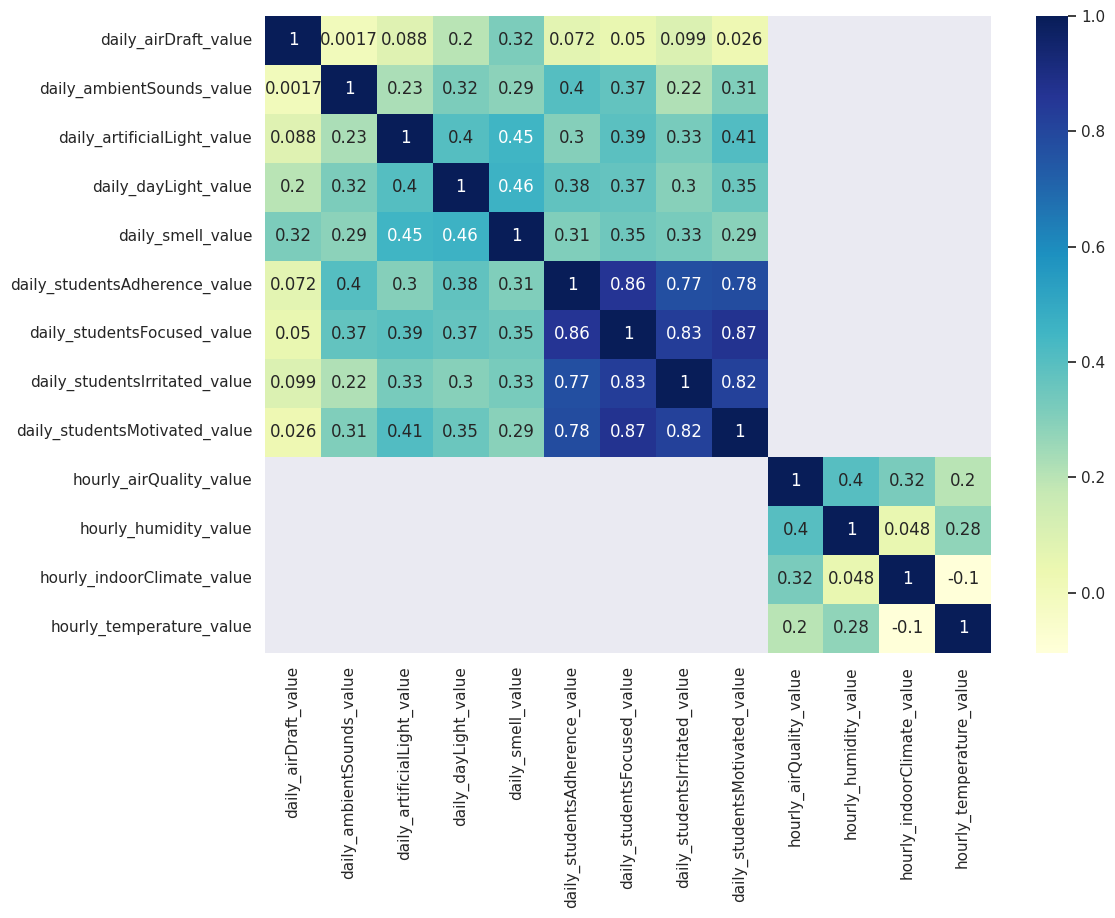

In [149]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
# plotting correlation heatmap
feedback_dataplot = sns.heatmap(feedback_df.corr(), cmap="YlGnBu", annot=True)
feedback_dataplot.get_figure().savefig("../plots/correleation_plot.png",bbox_inches='tight')


Plotting with jitter to vizualise the relationship between student focus and smell

In [150]:
def Jitter(values, jitter):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values


### Plotting affect on daily_studentsFocused_value

Daylight

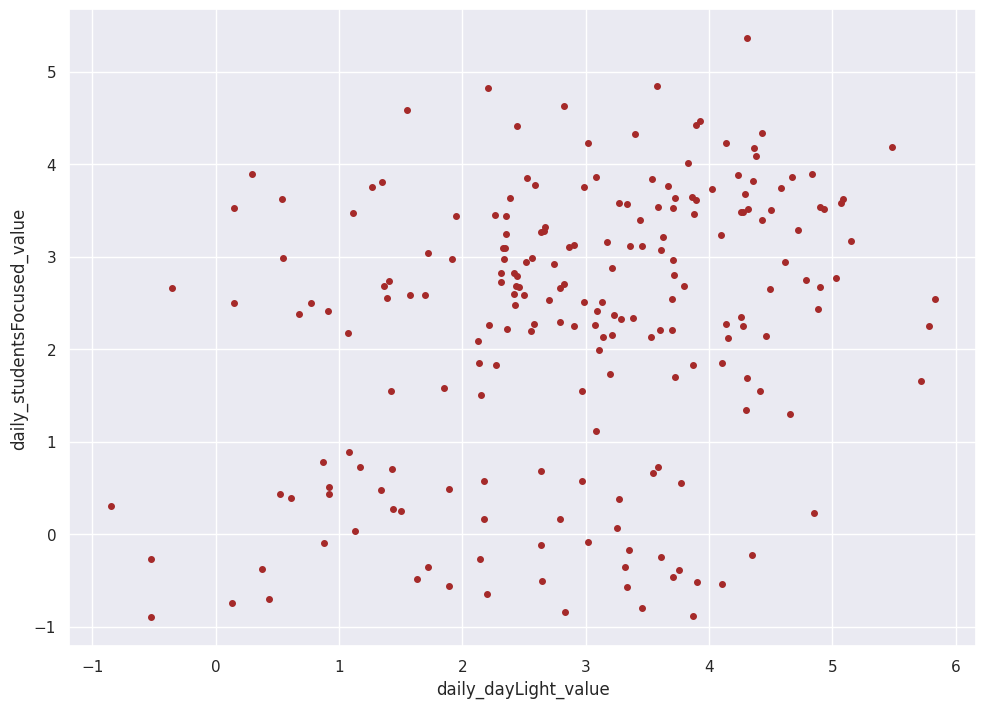

In [151]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.9)
fig = plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsFocused_value/daylight.png",bbox_inches='tight')


Artificial Light

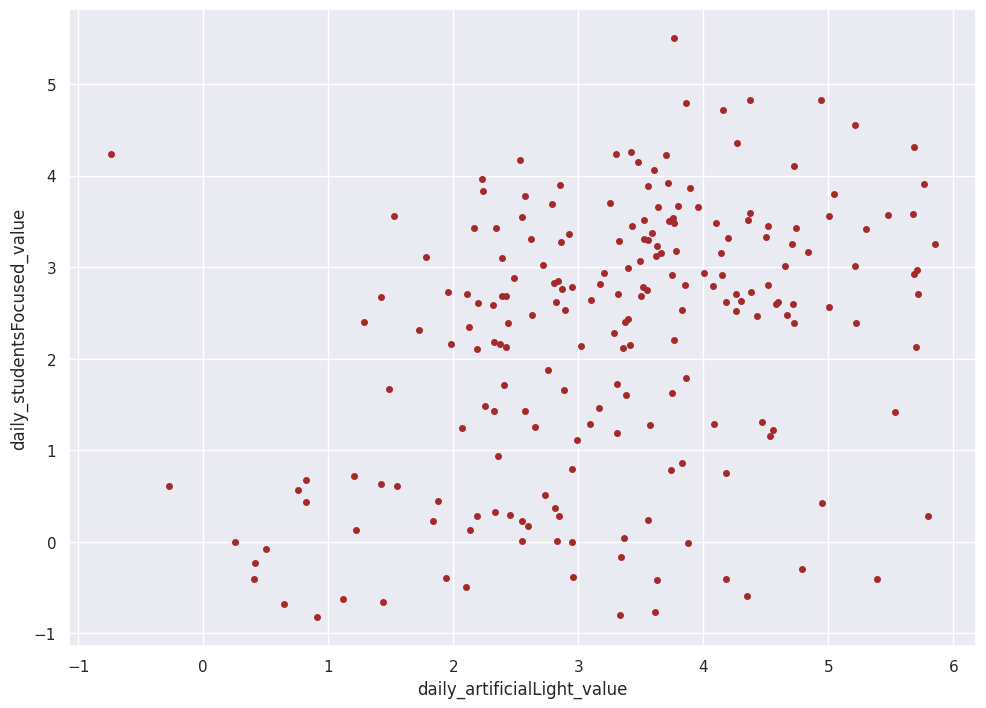

In [152]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsFocused_value')
plt.savefig("../plots/daily_studentsFocused_value/artificial_light.png",bbox_inches='tight')


Smell

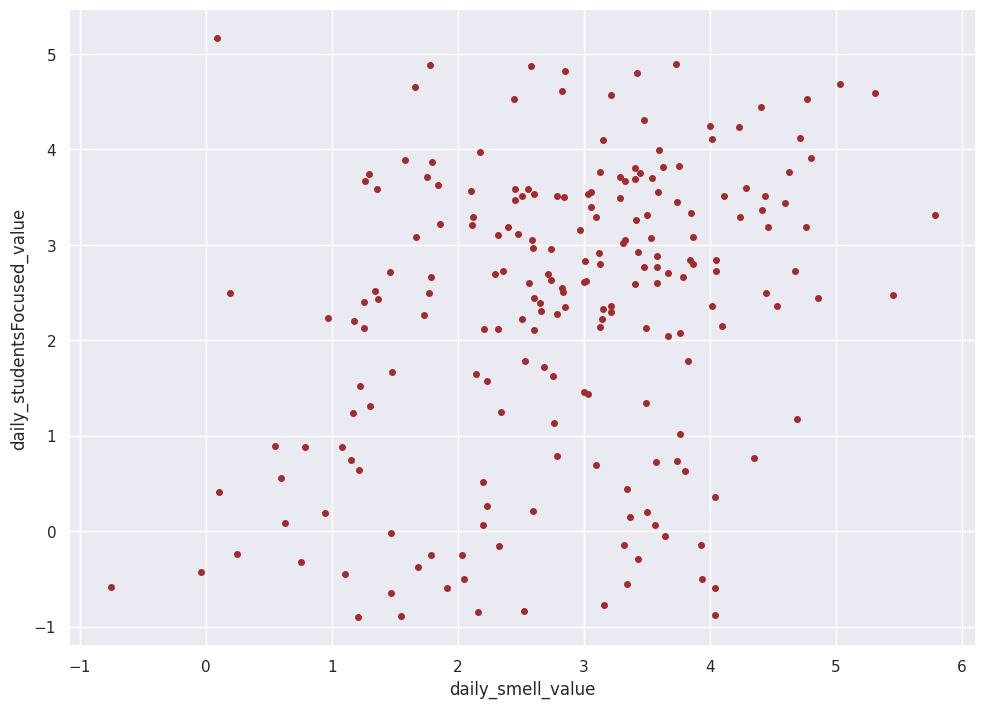

In [153]:
x1 = Jitter(feedback_df['daily_smell_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsFocused_value/smell.png",bbox_inches='tight')

Ambient sounds

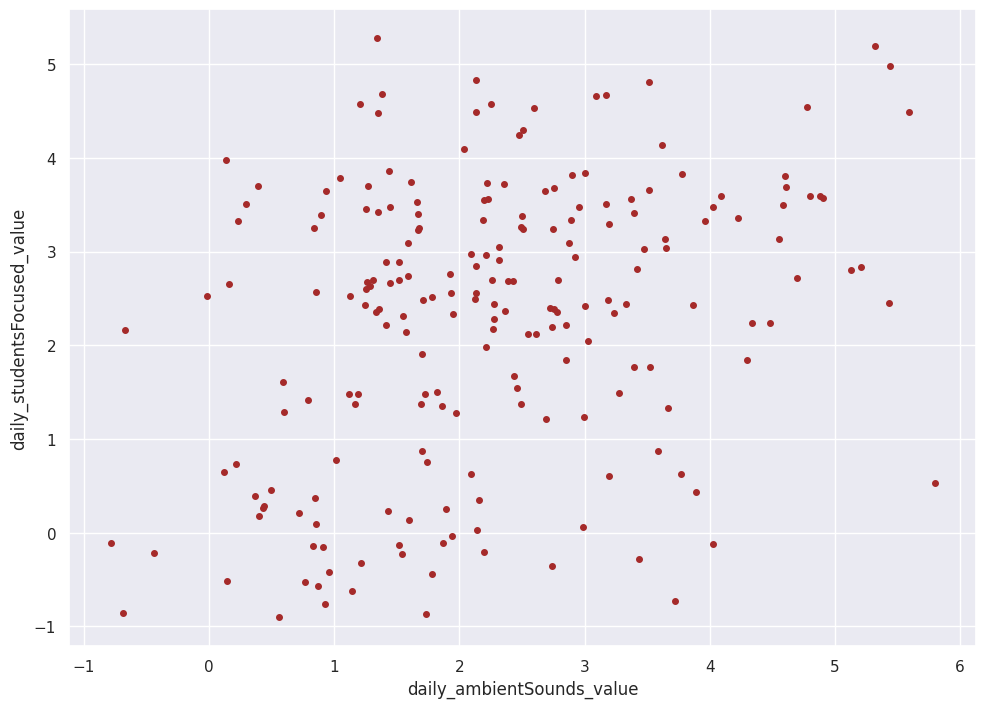

In [154]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsFocused_value/ambient_sounds.png",bbox_inches='tight')

### Plotting affect on daily_studentsIrritated_value

Daylight

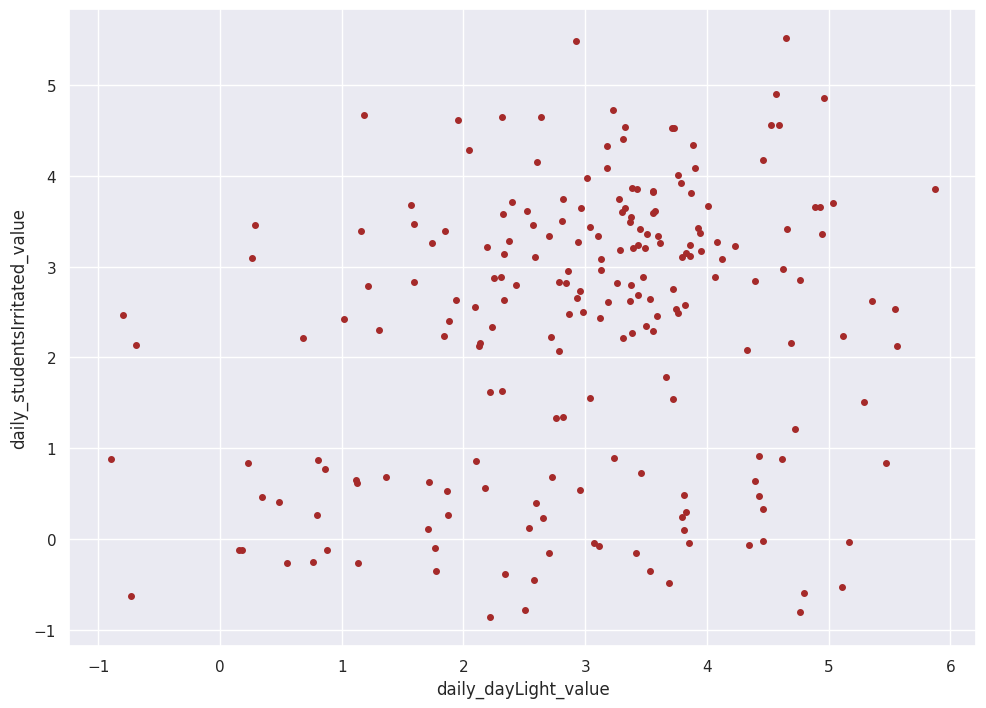

In [155]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsIrritated_value/daylight.png",bbox_inches='tight')

Artificial Light

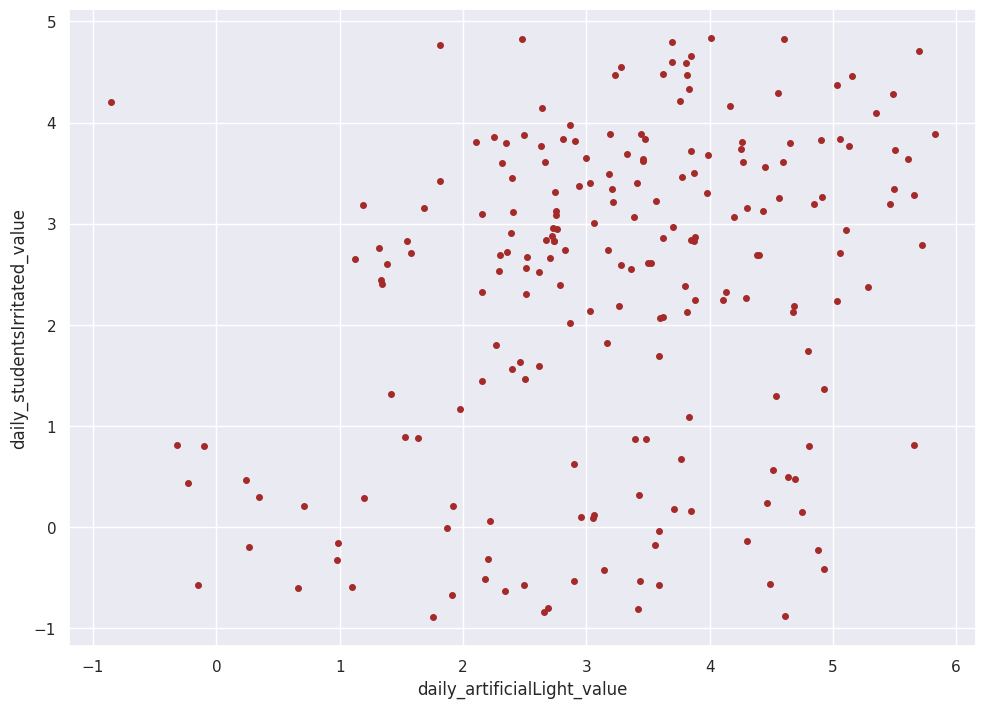

In [156]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsIrritated_value')

plt.savefig("../plots/daily_studentsIrritated_value/artificial_light.png",bbox_inches='tight')

Smell

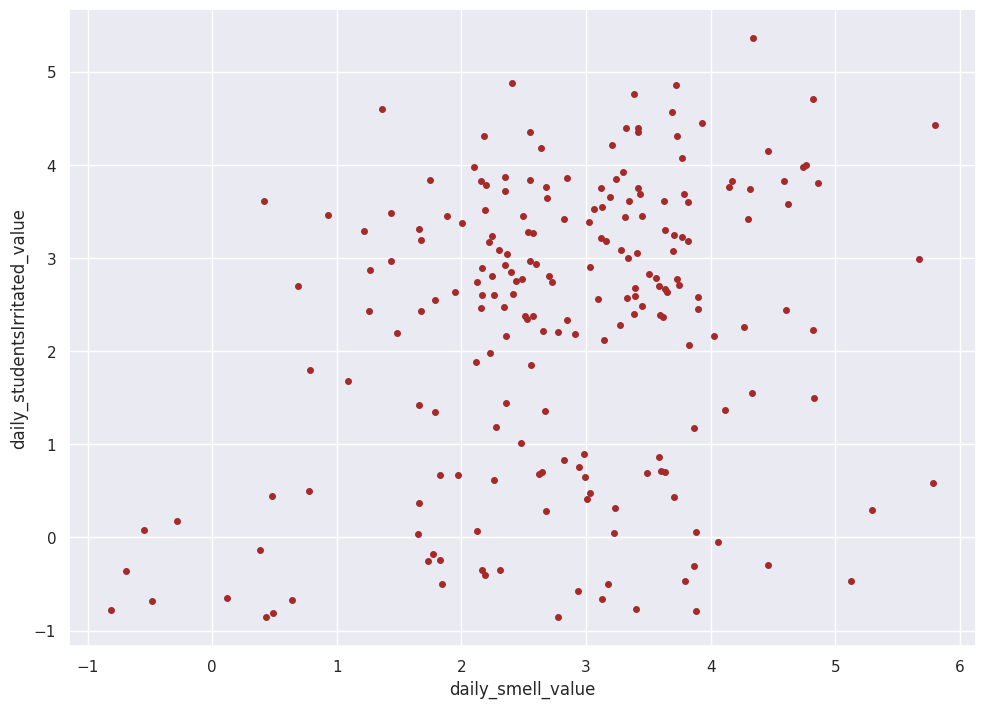

In [157]:
x1 = Jitter(feedback_df['daily_smell_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_smell_value')

plt.savefig("../plots/daily_studentsIrritated_value/smell.png",bbox_inches='tight')

Ambient sounds

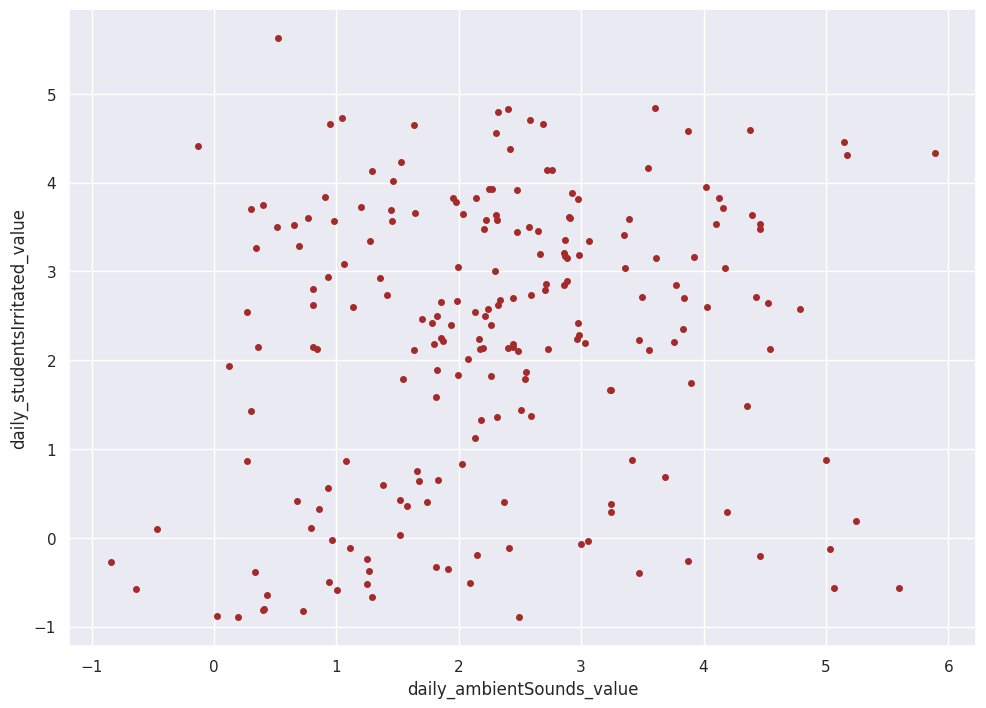

In [158]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_ambientSounds_value')

plt.savefig("../plots/daily_studentsIrritated_value/ambient_sounds.png",bbox_inches='tight')

### Plotting affect on daily_studentsAdherence_value

Daylight

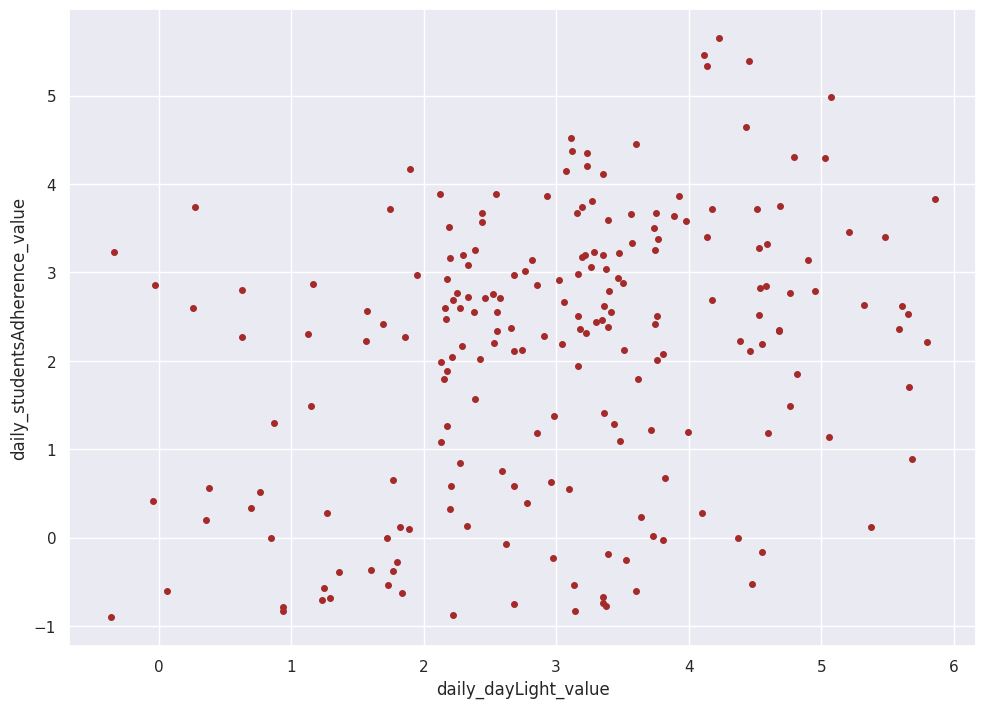

In [159]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_dayLight_value')

plt.savefig("../plots/daily_studentsAdherence_value/daylight.png",bbox_inches='tight')

Artificial Light

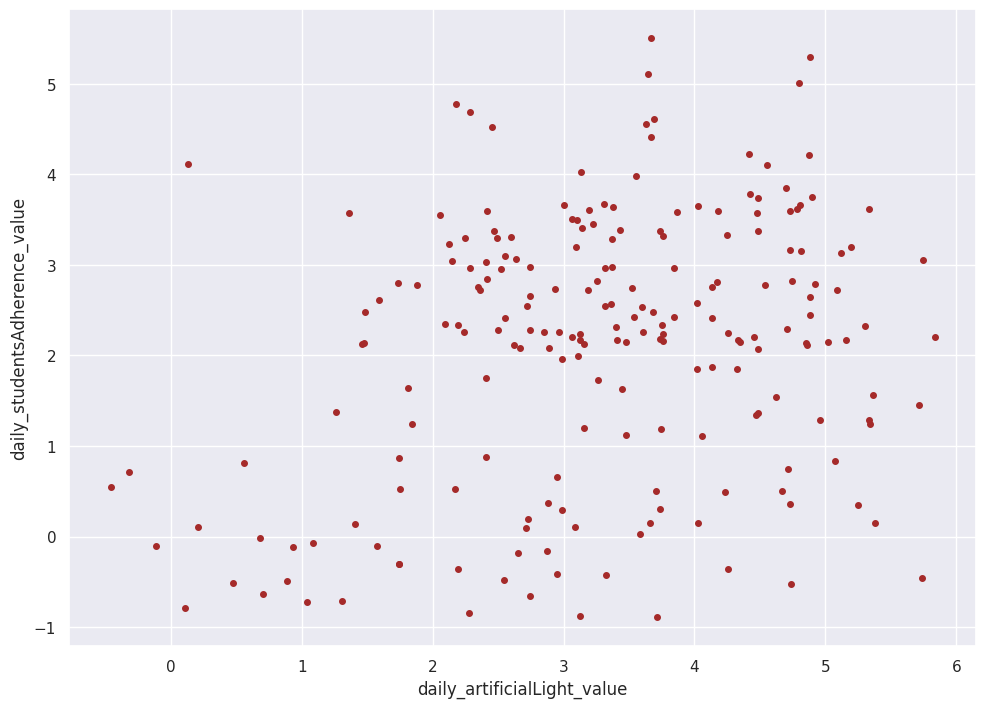

In [160]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsAdherence_value')

plt.savefig("../plots/daily_studentsAdherence_value/artificial_light.png",bbox_inches='tight')

Smell

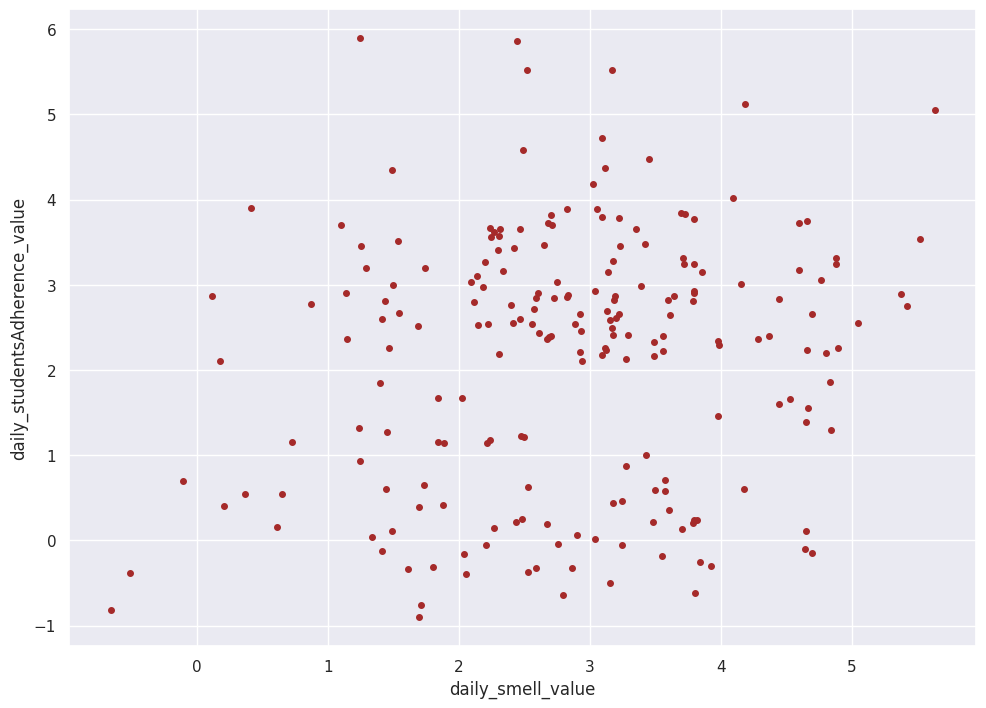

In [161]:
x1 = Jitter(feedback_df['daily_smell_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsAdherence_value/smell.png",bbox_inches='tight')

Ambient sounds

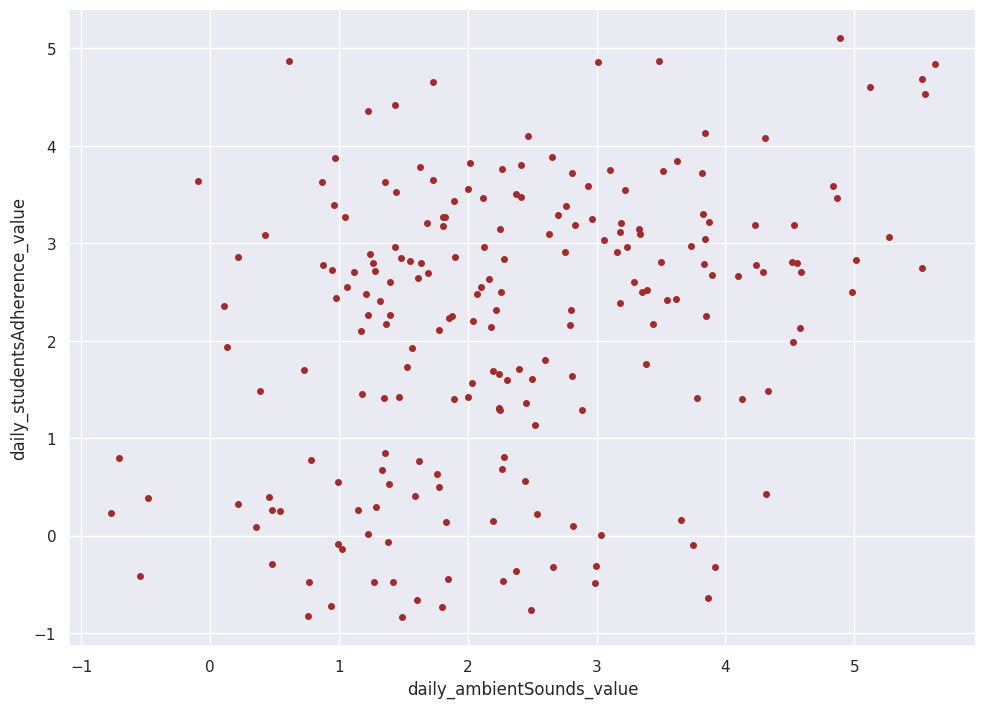

In [162]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsAdherence_value/ambient_sounds.png",bbox_inches='tight')

### Plotting affect on daily_studentsMotivated_value

Daylight

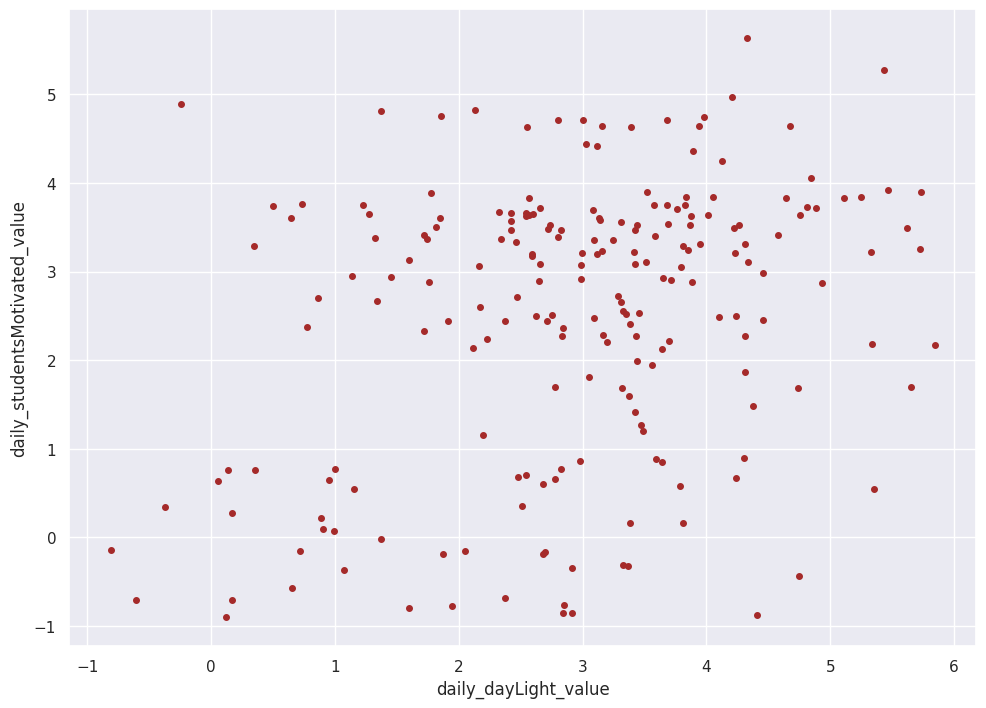

In [163]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsMotivated_value/daylight.png",bbox_inches='tight')

Artificial Light

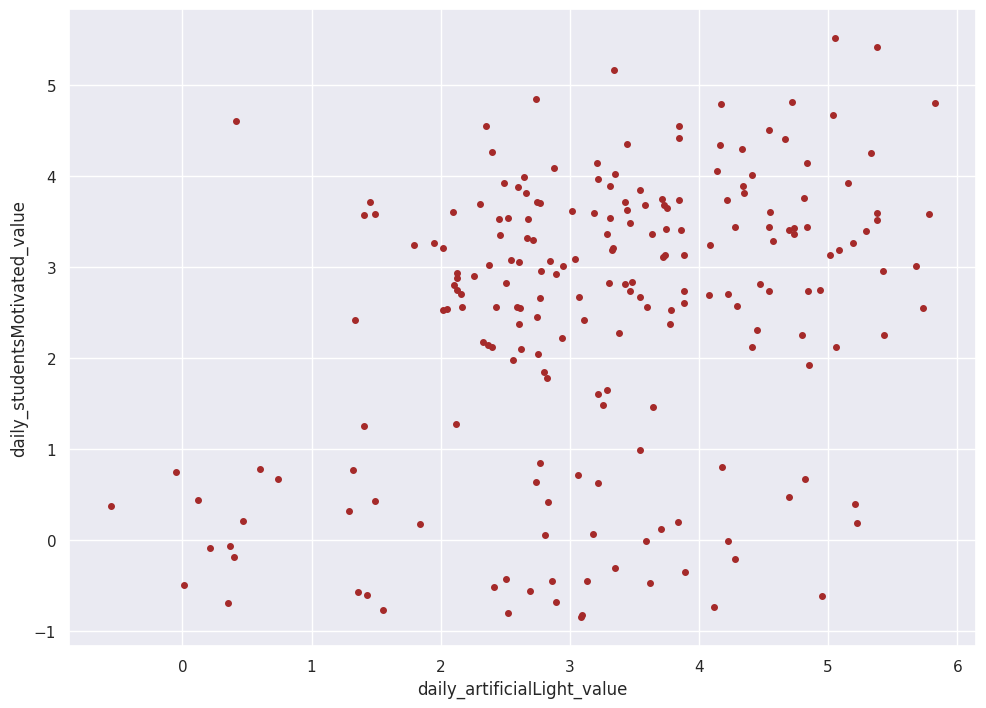

In [164]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsMotivated_value')
plt.savefig("../plots/daily_studentsMotivated_value/artificial_light.png",bbox_inches='tight')

Smell

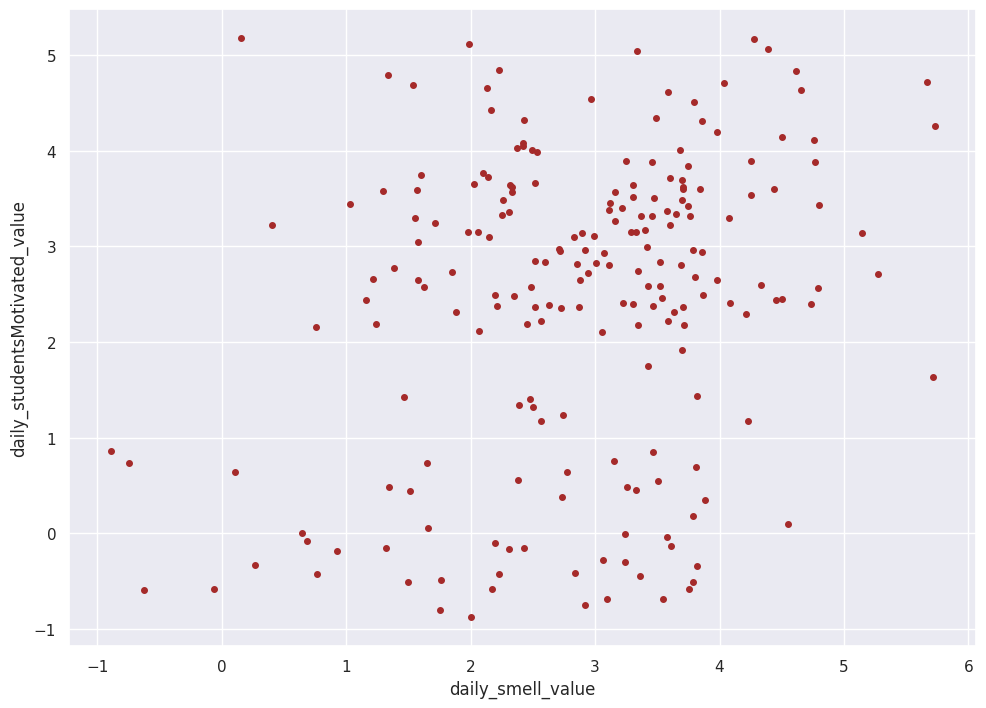

In [165]:
x1 = Jitter(feedback_df['daily_smell_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsMotivated_value/smell.png",bbox_inches='tight')

Ambient sounds

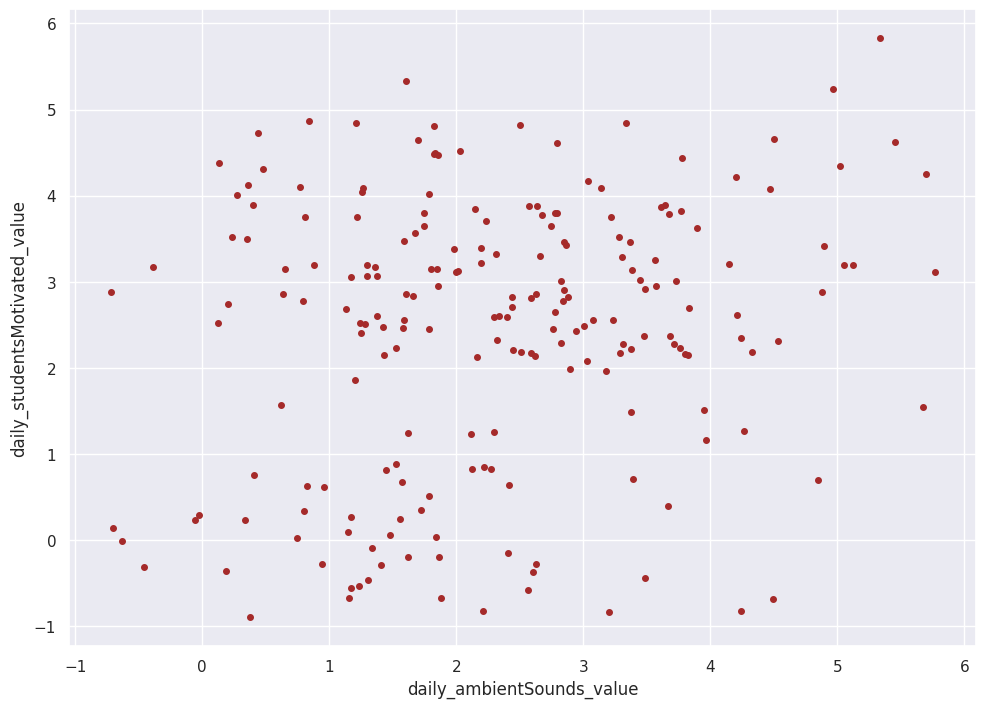

In [166]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsMotivated_value/ambient_sounds.png",bbox_inches='tight')

Translating teacher's comments to English

In [167]:
from deep_translator import GoogleTranslator

In [168]:
feedback_df['daily_additionalComment_value_english'] = feedback_df['daily_additionalComment_value'].dropna().apply(GoogleTranslator(source='auto', target='en').translate)